In [246]:
# fetch and load data 
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [247]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [248]:
housing = load_housing_data()

In [249]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [250]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [251]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [252]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

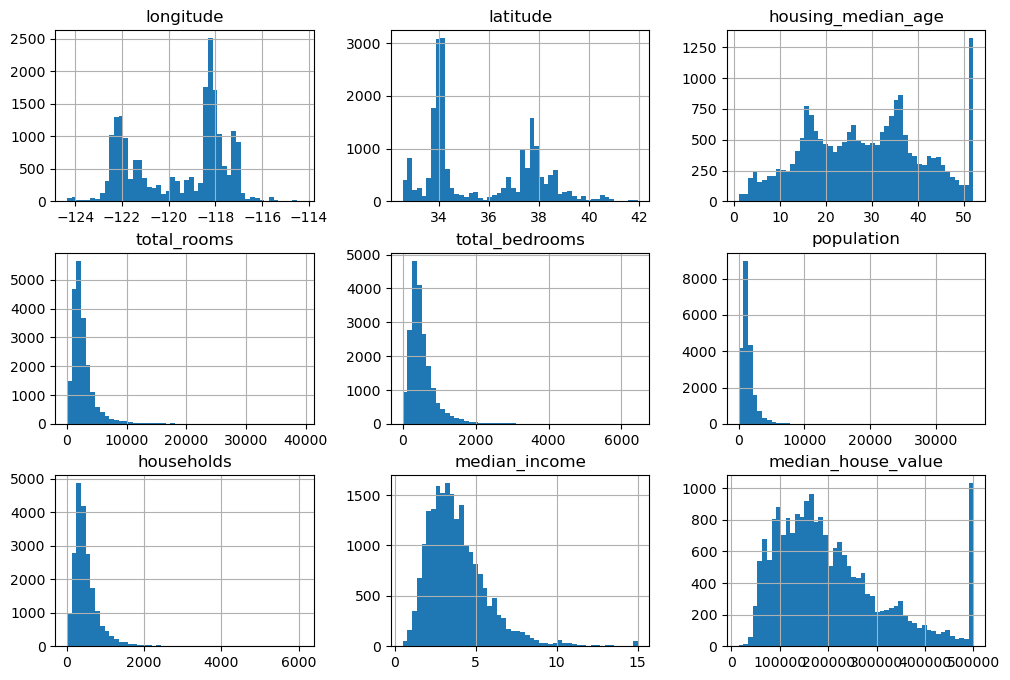

In [196]:
# plotting histogram 
housing.hist(bins=50, figsize=(12,8));

In [253]:
# Test dataset 

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [254]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [255]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


In [256]:
# make a category of income
housing['median_income'].value_counts()

median_income
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: count, Length: 12928, dtype: int64

In [257]:
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1,2,3,4,5])

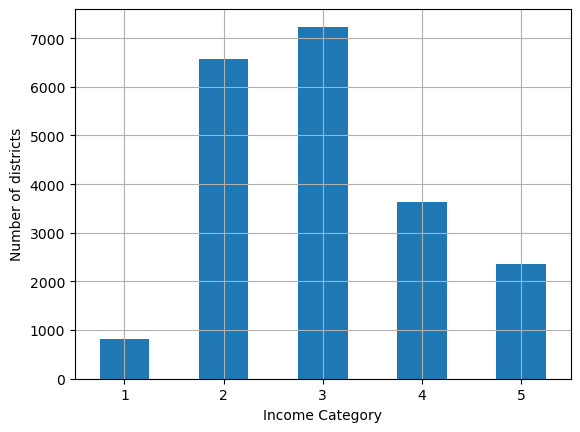

In [258]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

In [262]:
# startified sampling 

strat_train_set,strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['income_cat'])

In [263]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 5241 to 3965
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           4128 non-null   float64 
 1   latitude            4128 non-null   float64 
 2   housing_median_age  4128 non-null   float64 
 3   total_rooms         4128 non-null   float64 
 4   total_bedrooms      4079 non-null   float64 
 5   population          4128 non-null   float64 
 6   households          4128 non-null   float64 
 7   median_income       4128 non-null   float64 
 8   median_house_value  4128 non-null   float64 
 9   ocean_proximity     4128 non-null   object  
 10  income_cat          4128 non-null   category
dtypes: category(1), float64(9), object(1)
memory usage: 359.0+ KB


In [264]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [268]:
strat_test_set['income_cat'].value_counts()/len(start_test_set)


income_cat
3    0.087633
2    0.079700
4    0.044089
5    0.028585
1    0.009993
Name: count, dtype: float64

In [269]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis = 1, inplace=True)

In [270]:
start_test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Explore and visualize dataset to gain insight

In [271]:
df = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

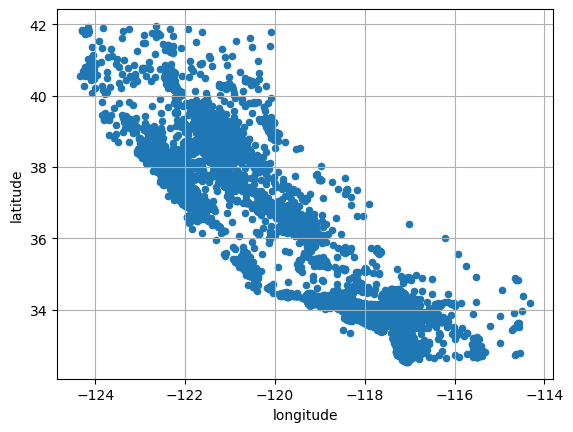

In [272]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True)

<Axes: xlabel='longitude', ylabel='latitude'>

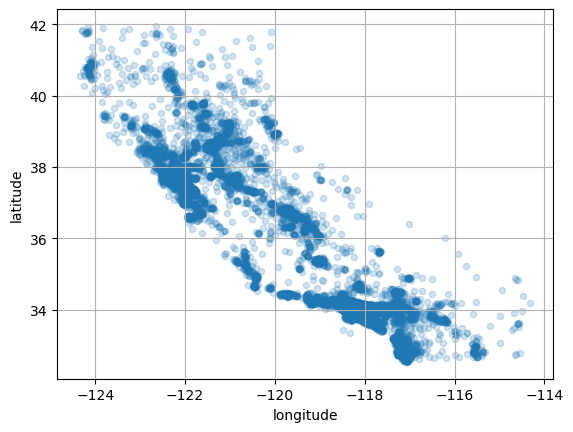

In [273]:
# setting alpha for high density of data
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

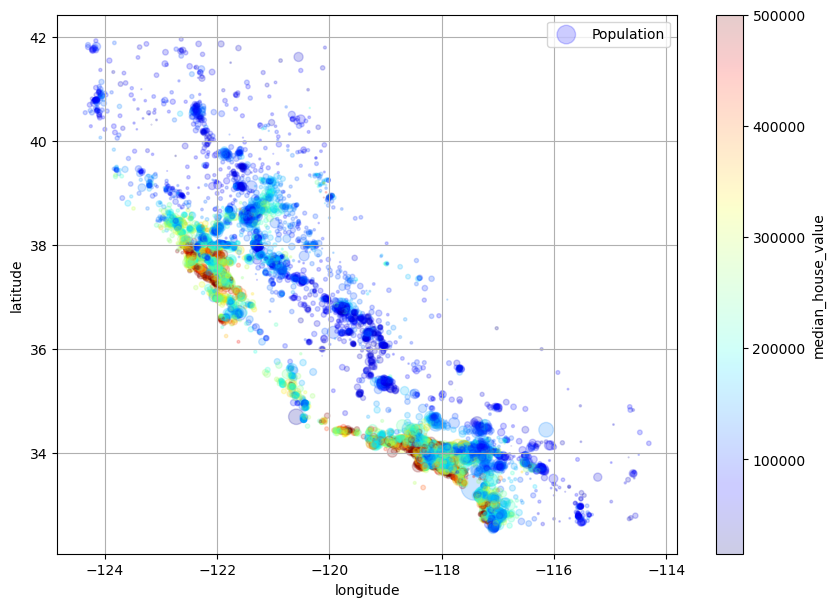

In [274]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True, alpha = 0.2, 
       s = df['population']/100, label = 'Population', 
       c = 'median_house_value', cmap = 'jet', colorbar = True, legend = True, sharex= True, figsize=(10,7))

In [285]:
# Pearson r correlation 
df.drop("ocean_proximity", axis =1 , inplace = True)
# corr_matrix = df.corr()
# corr_matrix['median_house_value'].sort_values(ascending=False)

In [286]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_house', 'beedroom_ratio',
       'people_per_house'],
      dtype='object')

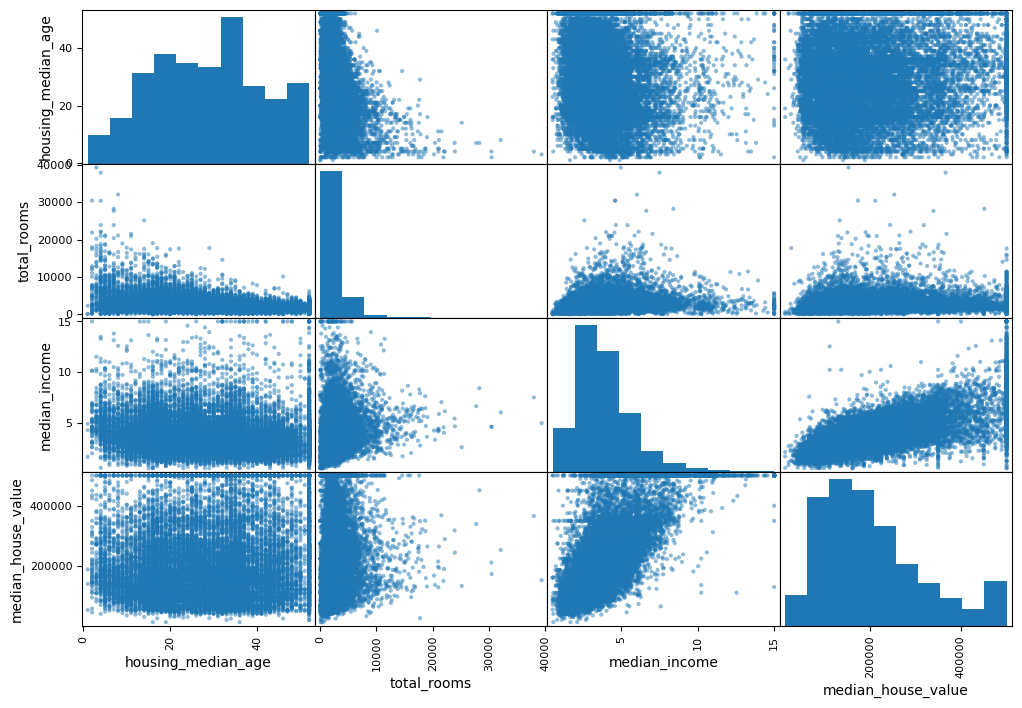

In [279]:
# scatter matrix 

from pandas.plotting import scatter_matrix
attributes = ['housing_median_age', 'total_rooms','median_income',
       'median_house_value']
scatter_matrix(df[attributes], figsize = (12, 8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

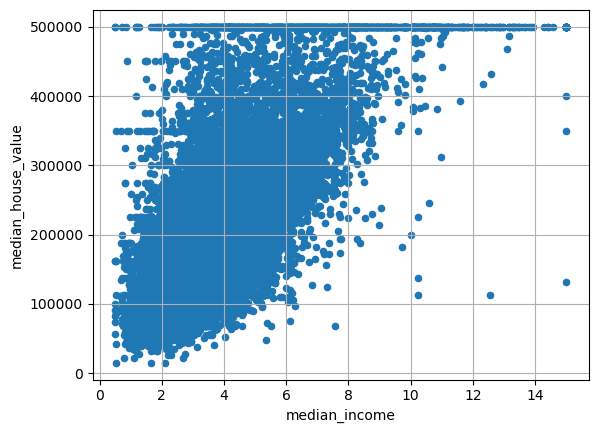

In [280]:
df.plot(kind= 'scatter', y = 'median_house_value', x='median_income', grid = True)

In [281]:
df['rooms_per_house'] = df['total_rooms']/df['households']
df['beedroom_ratio'] = df['total_bedrooms']/ df['total_rooms']
df['people_per_house'] = df['population']/df['households']

In [287]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
beedroom_ratio       -0.259952
Name: median_house_value, dtype: float64

In [288]:
# copy 

housing = strat_train_set.drop("median_house_value", axis = 1)
housing_label = strat_train_set['median_house_value'].copy()

In [289]:
## clean the Data
# imputation setting some value for missing value in dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [290]:
median = housing['total_bedrooms'].median()
median

433.0

In [103]:
housing['total_bedrooms'].fillna(median, inplace= True)

In [220]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 5241 to 3965
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   ocean_proximity     4128 non-null   object 
dtypes: float64(8), object(1)
memory usage: 322.5+ KB


In [108]:
# Simple imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [109]:
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [110]:
imputer.statistics_

array([-118.46  ,   34.22  ,   28.    , 2159.5   ,  442.    , 1172.5   ,
        416.    ,    3.5132])

In [113]:
housing_num.median().values

array([-118.46  ,   34.22  ,   28.    , 2159.5   ,  442.    , 1172.5   ,
        416.    ,    3.5132])

In [114]:
# use the trained imputer to replace the all missing value 

X = imputer.transform(housing_num)

In [115]:
X

array([[-118.39  ,   34.12  ,   29.    , ..., 2184.    ,  960.    ,
           8.2816],
       [-120.42  ,   34.89  ,   24.    , ...,  855.    ,  283.    ,
           5.0099],
       [-118.45  ,   34.25  ,   36.    , ...,  808.    ,  275.    ,
           4.3839],
       ...,
       [-119.72  ,   34.44  ,   43.    , ...,  663.    ,  358.    ,
           4.7   ],
       [-117.91  ,   33.63  ,   30.    , ..., 1081.    ,  412.    ,
           4.9125],
       [-118.56  ,   34.19  ,   36.    , ..., 1246.    ,  426.    ,
           4.1111]])

In [116]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)

### Handling Text and Categorical Data 

In [117]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
5241,<1H OCEAN
17352,<1H OCEAN
3505,<1H OCEAN
7777,<1H OCEAN
14155,NEAR OCEAN


In [120]:
# converting categorical to number 
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [122]:
housing_cat_encoded[:8]

array([[0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [0.],
       [3.],
       [4.]])

In [123]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [126]:
# one hot encoding 
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [128]:
housing_cat_1hot[:8] #sparse matrix

<8x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [129]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [130]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [132]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### Feature scaling and Transformation

In [135]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Min max scaler 0-1
min_max_scaler = MinMaxScaler()
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
# Standarized scaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [136]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_label.to_frame())

model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)
some_new_data = housing[['median_income']].iloc[:5]

scaled_prediction = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_prediction)

In [141]:
predictions, scaled_prediction

(array([[392541.49844167],
        [255020.20815687],
        [228707.18198752],
        [181919.59504006],
        [227404.14075549]]),
 array([[ 1.63173701],
        [ 0.42713041],
        [ 0.19664359],
        [-0.21318849],
        [ 0.1852297 ]]))

In [138]:
some_new_data

,median_income
5241,8.2816
17352,5.0099
3505,4.3839
7777,3.2708
14155,4.3529


In [139]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[['median_income']], scaled_labels)
prediction = model.predict(some_new_data)

In [140]:
prediction

array([[ 1.63173701],
       [ 0.42713041],
       [ 0.19664359],
       [-0.21318849],
       [ 0.1852297 ]])

### Custom Transformers

In [142]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[['population']])

In [145]:
##Custom transformer 

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean = True):
        self.with_mean = with_mean

    def fit(self, X, y = None):
        X = check_array(X)
        self.mean_ = X.mean(axis = 0)
        self.scale_ = X.std(axis = 0)
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X/self.scale_

In [154]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters = 10, gamma = 1.0, random_state = None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight = None):
        self.kmeans_ = KMeans(self.n_clusters, random_state = self.random_state)
        self.kmeans_.fit(X, sample_weight = sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma= self.gamma)

    def get_feature_name_out(self, names = None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [155]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[['latitude', 'longitude']], sample_weight = housing_label)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [158]:
similarities[:3].round(2)

array([[0.1 , 0.  , 0.65, 0.99, 0.  , 0.  , 0.04, 0.  , 0.  , 0.  ],
       [0.66, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.02, 0.  , 0.  ],
       [0.13, 0.  , 0.55, 0.95, 0.  , 0.  , 0.03, 0.  , 0.  , 0.  ]])

## Transform Pipelines

In [165]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram') 
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy='median')),
    ("standarized", StandardScaler()),
])

In [166]:
# Make pipeline
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

In [168]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[ 0.58, -0.7 ,  0.03,  1.6 ,  1.03,  0.61,  1.1 ,  2.36],
       [-0.43, -0.33, -0.36, -0.29, -0.53, -0.5 , -0.56,  0.62]])

In [169]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index = housing_num.index)
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5241,0.575070,-0.696573,0.032956,1.602218,1.025754,0.614330,1.104803,2.358455
17352,-0.434801,-0.334668,-0.362981,-0.285055,-0.534263,-0.495927,-0.556024,0.617359
3505,0.545222,-0.635472,0.587268,-0.526772,-0.616136,-0.535191,-0.575650,0.284222
7777,0.719338,-0.795274,0.508081,-0.441510,-0.494433,-0.314643,-0.511866,-0.308135
14155,1.231735,-1.331081,0.745643,0.464824,0.145064,0.038734,0.255990,0.267724
...,...,...,...,...,...,...,...,...
12182,1.122291,-0.884575,-0.758918,-0.187856,-0.268728,-0.201863,-0.347501,-0.549633
7275,0.649691,-0.757673,0.349706,-0.768916,-0.563029,-0.149232,-0.558477,-0.898470
17223,-0.086570,-0.546171,1.141580,-0.386942,-0.456815,-0.656325,-0.372033,0.452440
10786,0.813858,-0.926876,0.112144,-0.263313,-0.301920,-0.307125,-0.239559,0.565526


In [171]:
## handling both the num and char attributes 

from sklearn.compose import ColumnTransformer

num_attribs = housing_num.columns
cat_attribs = ['ocean_proximity']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs), 
    ("cat", cat_pipeline, cat_attribs),
])

In [174]:
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)), 
    (cat_pipeline, make_column_selector(dtype_include = object))
,)

In [175]:
housing_prepared = preprocessing.fit_transform(housing)

# PREPROCESSING

In [180]:
def column_ratio(X):
    return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )
    

In [291]:
log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
        StandardScaler()
    )
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.,random_state=42,)
default_num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ['total_bedrooms', 'total_rooms']),
    ("rooms_per_house", ratio_pipeline(), ['total_bedrooms', 'households']),
    ("people_per_house", ratio_pipeline(), ['population', 'households']),
    ("log", log_pipeline, ['total_bedrooms', "total_rooms", "population", "households","median_income"]),
    ("geo", cluster_simil, ['latitude', 'longitude']),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], 
                                 remainder = default_num_pipeline)

In [292]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(16512, 24)

# SELECT AND TRAIN MODEL PG - 88

In [294]:
# Linear Regression 
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x173...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1791c2b10>)])),
                ('linearregression', LinearRegression())])

In [295]:
lin_reg.fit(housing, housing_label)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x173...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1791c2b10>)])),
                ('linearregression', LinearRegression())])

In [297]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([ 74200., 289500., 179700., 188200., 279800.])

In [300]:
housing_label.iloc[:5].values

array([ 72100., 279600.,  82700., 112500., 238300.])

In [301]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_label, housing_predictions, squared=False)
lin_rmse

69061.91745654422

In [302]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_label)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x173...
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1791c2b10>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [303]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_label, housing_predictions, squared=False)

In [304]:
tree_rmse

0.0

### Cross Validation

In [309]:
from sklearn.model_selection import cross_val_score

tree_rmse = -cross_val_score(tree_reg, housing, housing_label, 
                            scoring="neg_root_mean_squared_error", 
                            cv=10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [310]:
pd.Series(tree_rmse).describe()

count       10.000000
mean     67107.292280
std       2250.215550
min      64640.945424
25%      65103.472030
50%      66996.063908
75%      68878.658589
max      71103.223738
dtype: float64

In [311]:
# RadomForestRegressors 

from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

forest_rmse = -cross_val_score(forest_reg, housing, housing_label, scoring="neg_root_mean_squared_error", cv = 10)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [312]:
pd.Series(forest_rmse).describe()

count       10.000000
mean     47610.620201
std       2527.899744
min      43611.475968
25%      45787.842919
50%      47593.948292
75%      49289.293690
max      51512.211593
dtype: float64

### Fine-tune Model

In [318]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = [
    {"preprocessing__geo__n_clusters": [5,8,10],
    "random_forest__max_features": [4,6,8]},
    
    {"preprocessing__geo__n_clusters": [10,15],
    "random_forest__max_features": [6,8,10]}
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring = 'neg_root_mean_squared_error')
grid_search.fit(housing, housing_label)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x1791c2b10>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [319]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [320]:
cv_res = pd.DataFrame(grid_search.cv_results_)

In [321]:
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [323]:
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,2.988000,0.039808,0.084241,0.000222,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43032.994464,-44463.611602,-45118.606309,-44205.070792,870.852726,1
13,3.867204,0.069683,0.082431,0.001394,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43656.508239,-44809.607171,-45624.354334,-44696.823248,807.318493,2
14,4.704610,0.066935,0.082683,0.001241,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44388.880398,-45193.577547,-46018.013409,-45200.157118,665.107039,3
7,2.925321,0.038581,0.080657,0.003068,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44436.753171,-45319.821119,-46154.347337,-45303.640542,701.298219,4
9,2.929959,0.040539,0.080901,0.001889,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44436.753171,-45319.821119,-46154.347337,-45303.640542,701.298219,4


## Randomized Search

In [328]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_disribs = {"preprocessing__geo__n_clusters": randint(low=3, high=50),
                "random_forest__max_features": randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=  param_disribs, n_iter = 10, cv = 3,
scoring = 'neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_label)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x1791c2b10>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1bbd79ad0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1bbd7bed0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [330]:
final_model = rnd_search.best_estimator_
feature_importance = final_model['random_forest'].feature_importances_
feature_importance.round(2)

array([0.09, 0.01, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.02, 0.  , 0.01, 0.03, 0.  , 0.01, 0.01, 0.02, 0.01,
       0.  , 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.02, 0.01, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

In [359]:
sorted(zip(feature_importance, 
          final_model['preprocessing'].get_feature_names_out()),
      reverse=True)

# feature_names_before_selection = trained_pipeline.named_steps['preprocessing'].get_feature_names()

AttributeError: Transformer geo (type ClusterSimilarity) does not provide get_feature_names_out.

In [342]:
final_model['preprocessing'].get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x1730bcd60>,
                                                                      func=<function column_ratio at 0...
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                      

In [346]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

macOS-10.16-x86_64-i386-64bit
Python 3.11.7 (main, Dec 15 2023, 12:09:04) [Clang 14.0.6 ]
NumPy 1.26.4
SciPy 1.11.4
Scikit-Learn 1.2.2


In [360]:
# Evaluate System on the test set

In [361]:
X_test = strat_test_set.drop("median_house_value", axis=1)

In [362]:
y_test = strat_test_set['median_house_value'].copy()

In [363]:
final_prediction = final_model.predict(X_test)

In [364]:
final_rmse = mean_squared_error(y_test, final_prediction, squared=False)

In [365]:
final_rmse

39807.32108628342

In [368]:
from scipy import stats
confidence = 0.95
squared_errors = (final_prediction - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([37949.84669164, 41581.90423987])

In [369]:
import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']